In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm
import binascii


In [76]:
df_all = pd.read_csv(
    "C:\\Users\Philipp\OneDrive - UT Cloud\Data_literacy_mensa\Mensa_data_combined\\Tuesday090124.csv")
df_all

C:\Users\Philipp\AppData\Local\Temp\ipykernel_16608\2583089859.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid,wlan.bssid,wlan.fc.type_subtype,frame.number,frame.len
0,"Jan 9, 2024 11:04:50.758777000 MitteleuropÃ¤i...",NaN,NaN,802.11,NaN,NaN,NaN,NaN,NaN
1,"Jan 9, 2024 11:04:50.765187000 MitteleuropÃ¤i...",00:f6:63:79:03:d0,ff:ff:ff:ff:ff:ff,802.11,656475726f616d,00:f6:63:79:03:d0,0x0008,NaN,NaN
2,"Jan 9, 2024 11:04:50.771920000 MitteleuropÃ¤i...",NaN,NaN,802.11,NaN,NaN,NaN,NaN,NaN
3,"Jan 9, 2024 11:04:50.774946000 MitteleuropÃ¤i...",e0:fd:02:63:c6:5f,0f:5e:85:70:61:ec,802.11,NaN,10:3b:b1:bc:9a:d5,0x002e,NaN,NaN
4,"Jan 9, 2024 11:04:50.775482000 MitteleuropÃ¤i...",NaN,NaN,802.11,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2698789,"Jan 9, 2024 14:08:12.643097000 MitteleuropÃ¤i...",NaN,NaN,802.11,NaN,NaN,NaN,270984.0,47.0
2698790,"Jan 9, 2024 14:08:12.643122000 MitteleuropÃ¤i...",NaN,NaN,802.11,NaN,NaN,NaN,270985.0,47.0
2698791,"Jan 9, 2024 14:08:12.643132000 MitteleuropÃ¤i...",NaN,NaN,802.11,NaN,NaN,NaN,270986.0,47.0
2698792,"Jan 9, 2024 14:08:12.646495000 MitteleuropÃ¤i...",b8:e6:9e:f3:c6:db,3e:fc:f1:27:45:e8,802.11,NaN,NaN,NaN,270987.0,4035.0


<Axes: ylabel='Density'>

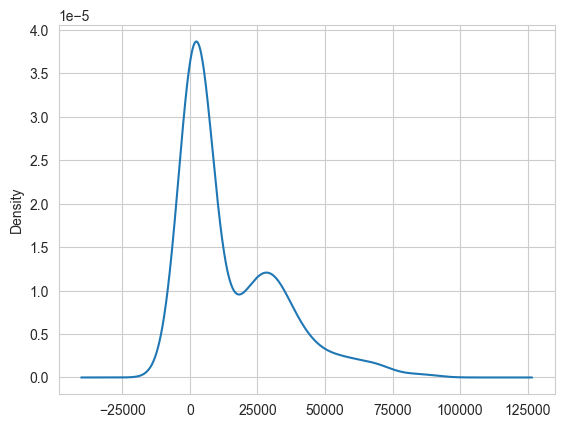

In [77]:
#df_all = df_all.loc[df_all["_ws.col.protocol"] == "EAP"]
df_all["frame.time"] = df_all["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df_all["frame.time"].value_counts().sort_index().plot(kind='density')


In [78]:
df_all['date-time'] = pd.to_datetime(df_all['frame.time'].str.replace('MitteleuropÃ¤ische Zeit', 'CET'),
                                     format='%b %d, %Y %H:%M %Z')
df_all['hour:minute'] = df_all['date-time'].dt.strftime('%H:%M')
df_all

,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid,wlan.bssid,wlan.fc.type_subtype,frame.number,frame.len,date-time,hour:minute
0,"Jan 9, 2024 11:04 MitteleuropÃ¤ische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,NaN,NaN,2024-01-09 11:04:00+01:00,11:04
1,"Jan 9, 2024 11:04 MitteleuropÃ¤ische Zeit",00:f6:63:79:03:d0,ff:ff:ff:ff:ff:ff,802.11,656475726f616d,00:f6:63:79:03:d0,0x0008,NaN,NaN,2024-01-09 11:04:00+01:00,11:04
2,"Jan 9, 2024 11:04 MitteleuropÃ¤ische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,NaN,NaN,2024-01-09 11:04:00+01:00,11:04
3,"Jan 9, 2024 11:04 MitteleuropÃ¤ische Zeit",e0:fd:02:63:c6:5f,0f:5e:85:70:61:ec,802.11,NaN,10:3b:b1:bc:9a:d5,0x002e,NaN,NaN,2024-01-09 11:04:00+01:00,11:04
4,"Jan 9, 2024 11:04 MitteleuropÃ¤ische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,NaN,NaN,2024-01-09 11:04:00+01:00,11:04
...,...,...,...,...,...,...,...,...,...,...,...
2698789,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,270984.0,47.0,2024-01-09 14:08:00+01:00,14:08
2698790,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,270985.0,47.0,2024-01-09 14:08:00+01:00,14:08
2698791,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,270986.0,47.0,2024-01-09 14:08:00+01:00,14:08
2698792,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",b8:e6:9e:f3:c6:db,3e:fc:f1:27:45:e8,802.11,NaN,NaN,NaN,270987.0,4035.0,2024-01-09 14:08:00+01:00,14:08


In [79]:
eduroam_ssid = "656475726f616d"

# df = df_all.loc[df_all['wlan.ssid'] == eduroam_ssid]

# eduroam_ssid_sources = df['wlan.sa'].unique().tolist()


df_eduroam_as_receiver_address = df_all.loc[df_all['wlan.da'].isin(eduroam_ssid_sources)]

df_beacons = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0008"]
df_beacons_only_broadcast = df_all.loc[(df_all["wlan.fc.type_subtype"] == "0x0008") & (df_all["wlan.da"] == "ff:ff:ff:ff:ff:ff")]
df_eduroam_beacons = df_beacons_only_broadcast.loc[df_beacons_only_broadcast["wlan.ssid"] == eduroam_ssid]
# 
# df_one_dest = df_all.loc[df_all["wlan.da"] == "00:f6:63:79:03:d0"]
# df_one_source = df_all.loc[df_all["wlan.sa"] == "00:f6:63:79:03:d0"]
# 
# eduroam_beacons_list = df_eduroam_beacons["wlan.sa"].unique().tolist()
# df_eduroam_beacons_dest = df_all[df_all["wlan.da"].isin(eduroam_beacons_list)]
# 
# # The ^ tell the regular expression, that it start with the pattern that follows
cisco_pattern = "^" + "00:f6:63:"
# 
df_cisco_beacons = df_beacons_only_broadcast.loc[df_beacons_only_broadcast["wlan.sa"].str.match(cisco_pattern)]
df_cisco_beacons_eduroam = df_cisco_beacons.loc[df_cisco_beacons['wlan.ssid'] == eduroam_ssid]
eduroam_ciscos_list = df_cisco_beacons_eduroam["wlan.sa"].unique().tolist()
# 
# df_cisco_eduroam_dest = df_all[df_all["wlan.da"].isin(eduroam_ciscos_list)]
# 
df_data = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0020"]

df_probe_request = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0004"]
df_probe_response = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0005"]
df_eduroam_response = df_probe_response.loc[df_probe_response["wlan.ssid"] == eduroam_ssid]

df_association_request = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0000"]
df_association_response = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0010"]

df_eduroam_cisco_response = df_eduroam_response.loc[df_eduroam_response["wlan.sa"].str.match(cisco_pattern)]

df_connected_devices = df_data[~df_data['wlan.sa'].isin(eduroam_ciscos_list)]

eduroam_beacon_bssids = df_eduroam_beacons['wlan.bssid'].unique().tolist()

df_eduroam_bssids = df_all.loc[df_all["wlan.bssid"].isin(eduroam_beacon_bssids)]
df_ssid_missing_with_bssids = df_eduroam_bssids.loc[df_eduroam_bssids["wlan.ssid"] == "<MISSING>"] 

df_ssid_eduroam_with_bssids = df_eduroam_bssids.loc[df_eduroam_bssids["wlan.ssid"] == eduroam_ssid] 

# df = df_cisco_eduroam_dest

print(f"All Beacons: {df_beacons['wlan.sa'].nunique()}")
# print(f"All types per Beacon: {df_beacons['wlan.fc.type_subtype'].nunique()}")
# print(f"Only broadcasted Beacons: {df_beacons_only_broadcast['wlan.sa'].nunique()}")
# print(f"Eduroam Brodcast Beacons: {df_eduroam_beacons['wlan.sa'].nunique()}")
# print(f"Number of macs if only most popular beacon is destination: {df_one_dest['wlan.sa'].nunique()}")
# print(f"Number of macs if only most popular beacon is source: {df_one_source['wlan.da'].nunique()}")
# print(f"Number of macs for eduroam if beacons are destination: {df_eduroam_beacons_dest['wlan.sa'].nunique()}")
# print(f"Number of cisco Beacons: {df_cisco_beacons['wlan.sa'].nunique()}")
# print(f"Number of cisco Beacons that broadcast eduroam: {df_cisco_beacons_eduroam['wlan.sa'].nunique()}")
# print(f"Number of all mac addresses that are connected to an eduroam cisco beacon: {df_cisco_eduroam_dest['wlan.sa'].nunique()}")
# print(f"Number of mac addresses that send data: {df_data['wlan.sa'].nunique()}")
print(f"Number of source mac addresses that have ssid eduroam: {df['wlan.sa'].nunique()}")
#print(f"Number of receiver mac addresses that have ssid eduroam: {df['wlan.ra'].nunique()}")
print(f"Number of destination mac addresses that have ssid eduroam: {df['wlan.da'].nunique()}")
print(f"Number of mac addresses that probe: {df_probe_request['wlan.sa'].nunique()}")
print(f"Number of mac addresses that respond to a probe: {df_probe_response['wlan.sa'].nunique()}")
print(f"Number of mac addresses that are targeted by a response: {df_probe_response['wlan.da'].nunique()}")
print(f"Number of ssid in the responses: {df_probe_response['wlan.ssid'].nunique()}")
print(f"Number of mac that respond in eduroam: {df_eduroam_response['wlan.sa'].nunique()}")
print(f"Number of mac that are responded to in eduroam: {df_eduroam_response['wlan.da'].nunique()}")
print(f"Number of mac that are responded to in eduroam using cisco: {df_eduroam_cisco_response['wlan.da'].nunique()}")
print(f"Number of mac addresses that are connected: {df_connected_devices['wlan.sa'].nunique()}")
print(f"Number of mac adds that requested association: {df_association_request['wlan.sa'].nunique()}")
print(f"Number of mac adds that that where request for assos: {df_association_request['wlan.da'].nunique()}")
print(f"Number of mac adds that responded to association: {df_association_response['wlan.sa'].nunique()}")
print(f"Number of mac adds that that where responded to for assos: {df_association_response['wlan.da'].nunique()}")
print(f"Number of mac that us the bssid of eduroam beacons: {df_eduroam_bssids['wlan.sa'].nunique()}")
print(f"Number of mac that us the bssid of eduroam beacons and have a missing ssid: {df_ssid_missing_with_bssids['wlan.sa'].nunique()}")
print(f"Number of mac that us the bssid of eduroam beacons and have eduroam ssid: {df_ssid_eduroam_with_bssids['wlan.sa'].nunique()}")
print(f"Number of mac that send to mac addresses from eduroam: {df_eduroam_as_receiver_address['wlan.sa'].nunique()}")

All Beacons: 3428
Number of source mac addresses that have ssid eduroam: 2301
Number of destination mac addresses that have ssid eduroam: 14881
Number of mac addresses that probe: 33682
Number of mac addresses that respond to a probe: 4898
Number of mac addresses that are targeted by a response: 23328
Number of ssid in the responses: 1924
Number of mac that respond in eduroam: 411
Number of mac that are responded to in eduroam: 13033
Number of mac that are responded to in eduroam using cisco: 12847
Number of mac addresses that are connected: 1853
Number of mac adds that requested association: 2345
Number of mac adds that that where request for assos: 2347
Number of mac adds that responded to association: 0
Number of mac adds that that where responded to for assos: 0
Number of mac that us the bssid of eduroam beacons: 3249
Number of mac that us the bssid of eduroam beacons and have a missing ssid: 25
Number of mac that us the bssid of eduroam beacons and have eduroam ssid: 425
Number of

In [95]:
eduroam_ssid = "656475726f616d"

# Authentication with all networks around
df_dpa = df_all.loc[df_all['_ws.col.protocol'] == "EAP"]

# Authentication with all cisco devices
df_dpa_cisco = df_dpa.loc[df_dpa["wlan.sa"].str.match(cisco_pattern)]

# Authenticated mac addresses as a list
dpa_cisco_list = df_dpa_cisco["wlan.da"].unique().tolist()

# All data filterd for eduroam, UTGuest and Guest
df = df_all.loc[(df_all["wlan.ssid"] == eduroam_ssid)|(df_all["wlan.ssid"] == "55546775657374" )|( df_all["wlan.ssid"] =="4775657374")]

# all unique mac addresses with the ssids
all_sources = df["wlan.sa"].unique().tolist()

# Combination of mac addresses of the ssids and EPA
combined_macs = list(set(all_sources + dpa_cisco_list))

print(f"Number of unqiue mac addresses verfied by cisco: {df_dpa_cisco['wlan.da'].nunique()}")

# All entries that use the resulting mac addresses
df = df_all.loc[df_all['wlan.sa'].isin(combined_macs)]

# result_concat = pd.concat([result, result_da])
# result_concat = result_concat
# # Step 2: Group by beacons and count the number of unique entries in wlan.sa
# unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
# unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]
# 
# # Step 3: Merge the two DataFrames on "wlan.ssid"
# result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
# result = result.to_numpy()

Number of unqiue mac addresses verfied by cisco: 329
                                         frame.time            wlan.sa  \
111339   Jan  9, 2024 12:18 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
111341   Jan  9, 2024 12:18 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
112738   Jan  9, 2024 12:19 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
112739   Jan  9, 2024 12:19 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
112740   Jan  9, 2024 12:19 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
112741   Jan  9, 2024 12:19 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
112988   Jan  9, 2024 12:20 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
112990   Jan  9, 2024 12:20 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
113691   Jan  9, 2024 12:20 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
113692   Jan  9, 2024 12:20 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
116540   Jan  9, 2024 12:23 MitteleuropÃ¤ische Zeit  08:cc:27:6b:0e:15   
116962   Jan  9, 2024 12:24 MitteleuropÃ¤ische Zeit  08:cc:

In [81]:
# This gives us the count of entries per ssid
unique_counts = df_all.groupby("wlan.sa")
ssids_counts = df_all["wlan.sa"].value_counts().reset_index()
ssids_counts.columns = ["Source", "Count"]
ssids_counts = ssids_counts.to_numpy()

In [82]:
ssids_counts = df_all["wlan.ssid"].value_counts().reset_index()
ssids_counts.columns = ["wlan.ssid", "count"]

# Step 2: Group by WLAN SSID and count the number of unique entries in wlan.sa
unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]

# Step 3: Merge the two DataFrames on "wlan.ssid"
result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
result = result.to_numpy()

In [83]:
# Conversion from hexadecimal to "human"
def hex_to_str(hex_str):
    if len(hex_str) % 2 != 0:
        return hex_str
    bytes_obj = binascii.unhexlify(hex_str)
    return bytes_obj.decode('latin-1')


vec_func = np.vectorize(hex_to_str)

result[:,0] = vec_func(result[:,0])

C:\Philipp\Studium\WS23-24\Data Literacy\dataLiteracyPeopleCounting\lit_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


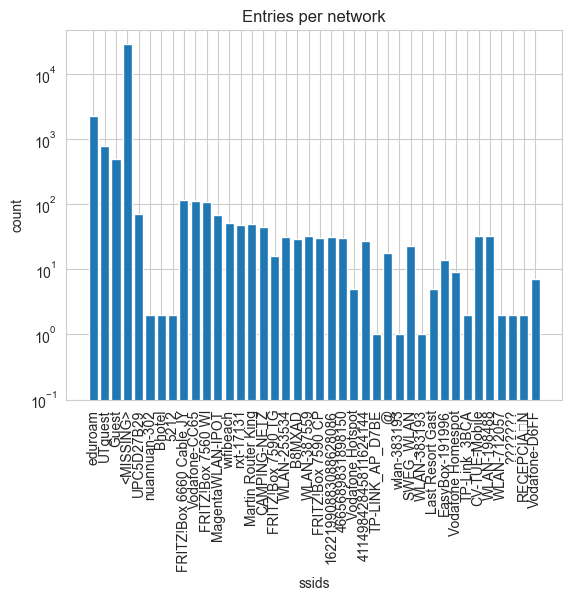

In [84]:
# This displays the first 40 ssids and their number of entries

names = result[:40, 0]
value = result[:40, 2].astype(int)

plt.bar(names, value)
plt.xlabel("ssids")
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.yscale("log")
plt.ylim(bottom=0.1)
plt.title("Entries per network")
plt.show()

In [96]:
df_first = df.drop_duplicates(subset='wlan.sa', keep='first')
df_first.tail()
df_first["wlan.sa"].nunique()

3577

Text(0.5, 1.0, 'first seen Count vs Time')

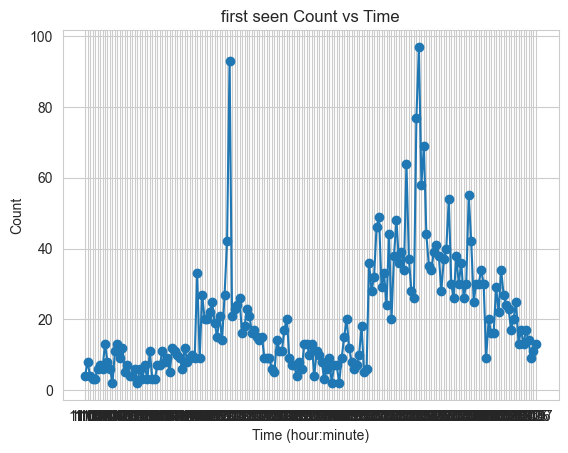

In [97]:
per_min_new = pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [98]:
df_last = df.drop_duplicates(subset='wlan.sa', keep='last')
df_last.tail()


,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid,wlan.bssid,wlan.fc.type_subtype,frame.number,frame.len,date-time,hour:minute
2697944,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",ae:22:db:4a:be:17,ff:ff:ff:ff:ff:ff,802.11,NaN,NaN,NaN,270139.0,176.0,2024-01-09 14:08:00+01:00,14:08
2698511,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",fa:2b:00:f8:ed:8d,ff:ff:ff:ff:ff:ff,802.11,NaN,NaN,NaN,270706.0,144.0,2024-01-09 14:08:00+01:00,14:08
2698742,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",00:f6:63:79:03:d1,ff:ff:ff:ff:ff:ff,802.11,NaN,NaN,NaN,270937.0,280.0,2024-01-09 14:08:00+01:00,14:08
2698773,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",00:f6:63:79:03:d0,ff:ff:ff:ff:ff:ff,802.11,NaN,NaN,NaN,270968.0,306.0,2024-01-09 14:08:00+01:00,14:08
2698785,"Jan 9, 2024 14:08 MitteleuropÃ¤ische Zeit",00:f6:63:79:03:d4,ff:ff:ff:ff:ff:ff,802.11,NaN,NaN,NaN,270980.0,292.0,2024-01-09 14:08:00+01:00,14:08


Text(0.5, 1.0, 'Last seen Count vs Time')

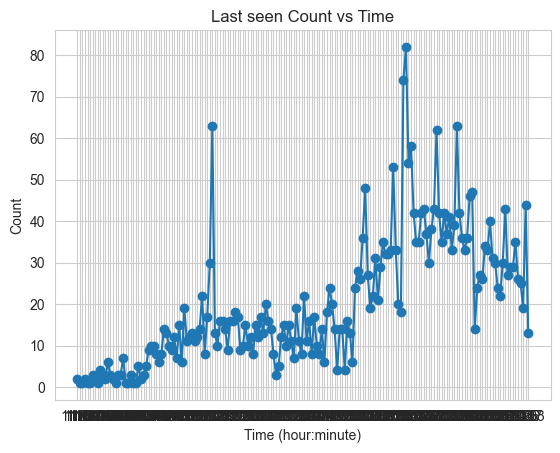

In [99]:
per_min_last = pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

Text(0.5, 1.0, 'Count vs Time')

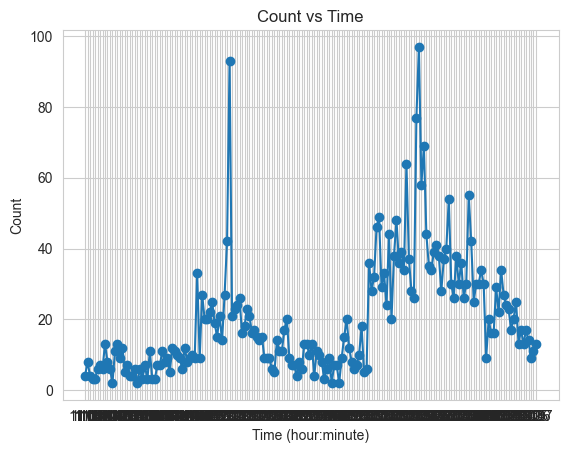

In [105]:
per_min = pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

C:\Users\Philipp\AppData\Local\Temp\ipykernel_16608\2572217220.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)


Text(0.5, 1.0, 'Count vs Time')

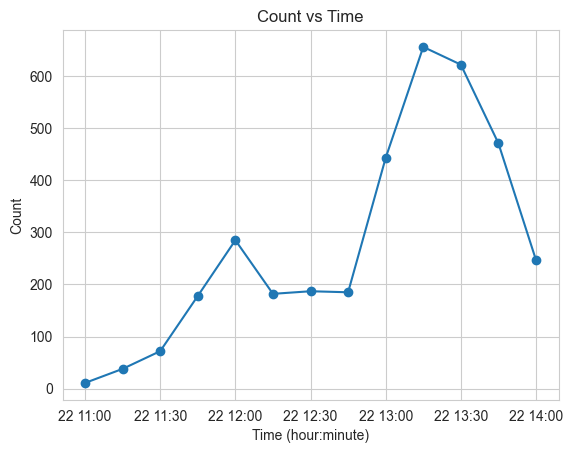

In [104]:
dtt = pd.DataFrame({'hour:minute': per_min.index.tolist(), 'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('15T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

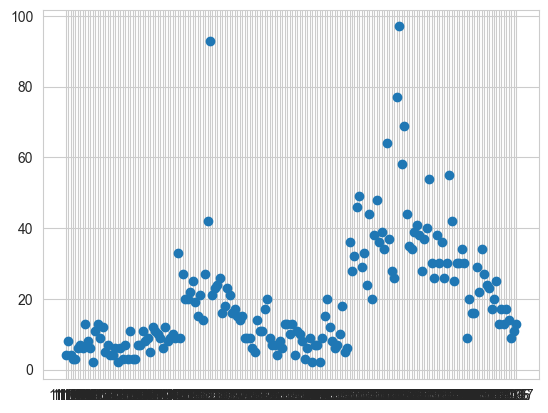

In [102]:
ax = plt.plot_date(per_min.index, per_min["count"], xdate=True)

In [15]:
from dateutil import parser
from datetime import datetime
import re